In [98]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
%matplotlib inline
import warnings
from matplotlib.ticker import FormatStrFormatter
warnings.filterwarnings('ignore')
from matplotlib import gridspec

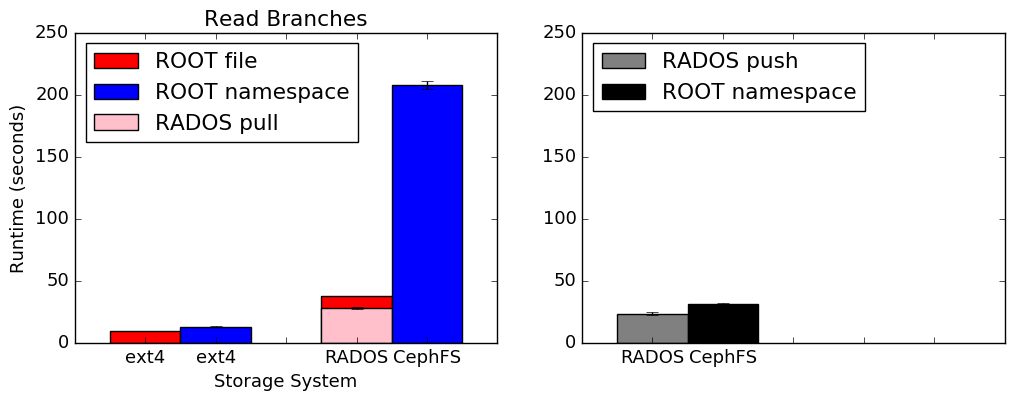

In [172]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    try: return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))
    except: return float(0)
def parse(expdir):
    df = pd.DataFrame(columns=['job', 'rtime', 'ts'])
    for run in [0, 1, 2, 3, 4, 5, 6]:
        rundir = expdir + '-run' + str(run)
        with open(rundir + '/summary.txt') as f:
            d = pd.read_csv(f, names=['job', 'delta', 'time'])
            d['rtime'] = d['delta'].apply(to_seconds)
            del d['time'], d['delta']
            d['run'] = run
            df = df.append(d, ignore_index=True)
    return df.pivot(index='run', values='rtime', columns='job')

font = {'size'   : 13}; matplotlib.rc('font', **font)
args = {'width': 1, 'capsize': 4, 'ecolor': 'black'}
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df = parse('../results-disk')
ax[0].bar([0.5], df['read_hep'].mean(), yerr=df['read_hep'].std(), color='red',  label='ROOT file', **args)
ax[0].bar([1.5], df['read_fpb'].mean(), yerr=df['read_fpb'].std(), color='blue', label='ROOT namespace', **args)

df = parse('../results-cephfs')
ax[0].bar([3.5], df['get'].mean() + df['read_hep'].mean(), yerr=df['read_hep'].std(), color='red', **args)
ax[0].bar([3.5], df['get'].mean(), yerr=df['get'].std(), color='pink', label='RADOS pull', **args)
ax[0].bar([4.5], df['read_fpb'].mean(), yerr=df['read_fpb'].std(), color='blue', **args)
ax[0].legend(loc='upper left')
ax[0].set_xticklabels(["", "ext4", "ext4", "", "RADOS", "CephFS"])
ax[0].set_xlim(0, 6)
ax[0].set_ylim(0, 250)
ax[0].set_ylabel("Runtime (seconds)")
ax[0].set_xlabel("Storage System")
ax[0].set_title("Read Branches")

ax[1].bar([0.5], df['push'].mean(), yerr=df['push'].std(), label='RADOS push',color='grey', **args)
ax[1].bar([1.5], df['write_fpb'].mean(), yerr=df['write_fpb'].std(), label='ROOT namespace', color='black', **args)
ax[1].set_xlim(0, 6)
ax[1].set_xticklabels(["", "RADOS", "CephFS"])
ax[1].set_ylim(0, 250)
x = ax[1].legend(loc='upper left')  